# ***Marco CRISP-DM***
### Datos de envío de comercio electrónico
### Semana 04 - Módulo 01 - Clase 07 - CRISP-DM.csv

*Suponemos que Fase 1 - comprensión del negocio o empresarial - está finalizada*

*Avanzamos con Fase 2 - preparación de datos.*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


*Empecemos importando las librerias y el dataset a utilizar.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

C_MAIN_PATH = '/content/drive/MyDrive/UP/00_Diplomatura_IA_2024/'
V_NOMBRE_ARCHIVO_MAESTRO = 'Semana 04 - Módulo 01 - Clase 07 - CRISP-DM'
V_PATH_Y_NOMRE_ARCHIVO = C_MAIN_PATH + V_NOMBRE_ARCHIVO_MAESTRO + '.csv'

Explorar el conjunto de datos sobre los productos que llegan a sus clientes a tiempo y crear modelos para determinar cuál predice mejor el resultado.

In [3]:
ecomm = pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ",")
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Usando este Dataset, llegamos a saber que el conjunto de datos consta de 12 columnas y 10,999 filas.
8 columnas de datos están en forma de números enteros, mientras que el resto está en forma de cadena.
También podemos concluir que no faltan valores en ninguna columna de los datos (10,999 no nulos para todas las columnas del conjunto de datos).


¿Qué voy a hacer con las columnas que no son enteras?

 1   Warehouse_block      object

 2   Mode_of_Shipment     object

 7   Product_importance   object

 8   Gender               object



In [4]:
ecomm.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



Reviso, por ejemplo, cuáles son los valores que puede tomar "Warehouse Block" - veo que no tiene valores para "E".

In [5]:
ecomm["Warehouse_block"].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

Podemos cambiar el nombre de la columna del Dataset reemplazando el guión bajo con el espaciado usando el método string.replace().
Después de eso, podemos poner en mayúscula la primera letra de cada nombre de columna y cambiar las demás a minúsculas usando el método string.title().

In [6]:
new_cols=[]
for i in ecomm.columns[1:-1]:
    i = i.replace("_"," ")
    i = i.title()
    new_cols.append(i);
new_cols = ['ID'] +  new_cols
new_cols.append('Arrival')
ecomm.columns = new_cols
ecomm.columns.to_list()

['ID',
 'Warehouse Block',
 'Mode Of Shipment',
 'Customer Care Calls',
 'Customer Rating',
 'Cost Of The Product',
 'Prior Purchases',
 'Product Importance',
 'Gender',
 'Discount Offered',
 'Weight In Gms',
 'Arrival']

Para obtener una comprensión básica de los datos, podemos usar las funciones DataFrame.describe().
Esta función devuelve estadísticas descriptivas por defecto para las variables numéricas.

In [7]:
#ecomm.iloc[:,1:-1].describe(include='object')
ecomm.iloc[:,1:-1].describe()

,Customer Care Calls,Customer Rating,Cost Of The Product,Prior Purchases,Discount Offered,Weight In Gms
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000


Además, podemos encontrar la información de los objetos incluyendo include='object' como parámetro.

In [8]:
ecomm.describe(include='object')

,Warehouse Block,Mode Of Shipment,Product Importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Antes de crear cualquier visualización, tenemos que entender cuál es el tipo de datos para cada una de las columnas del conjunto de datos.
Los datos bajo "Costo del producto", "Peso en gramos" y "Descuento ofrecido" son numéricos y podríamos usar histogramas para explorar la distribución de frecuencia acumulada de esas columnas.
Mientras tanto, podríamos utilizar gráficos de conteo para las variables restantes.

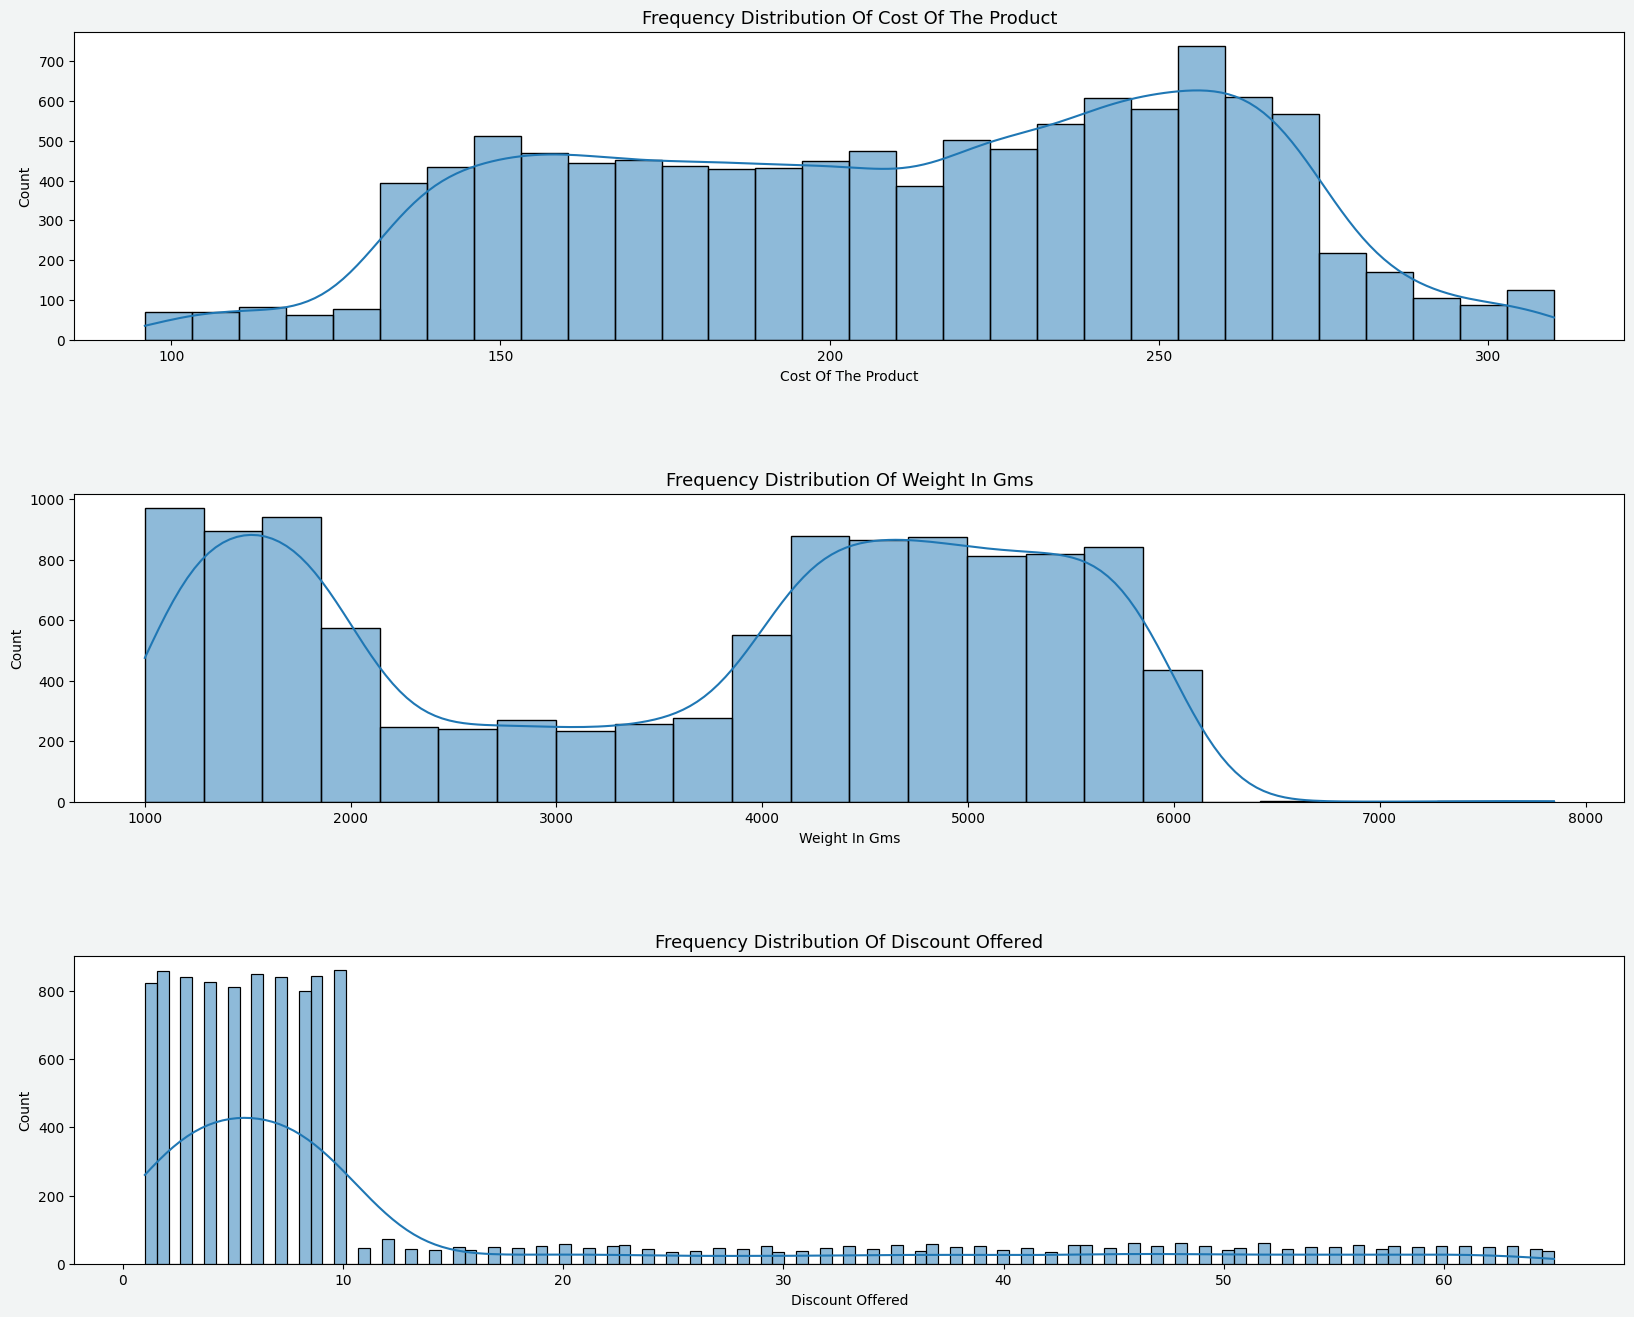

In [9]:
# Mostrando varios gráfiocos en una grilla
# Explorando la distribución de columnas numéricas, usando la distribución frecuencia acumulada.
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,16), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count=1
ls = ['Cost Of The Product', 'Weight In Gms', 'Discount Offered']
for i in ls:
    plt.subplot(3,1,count)
    h = sns.histplot(x=i, kde=True, data=ecomm)
    h.set_title(('frequency distribution of ' + i).title(), fontsize=13)
    count+=1

De los histogramas anteriores, podemos inferir que:

* El costo de la mayoría de los productos está entre "$240 y $275"
* El peso de la mayoría de los productos está entre 1.000 y 2.000 gr y entre 4.000 y 6.000 gr.
* El descuento que es más probable que se otorgue está entre el 1% y el 10%.

Hay muchos valores atípicos ubicados en el tercer cuartil.

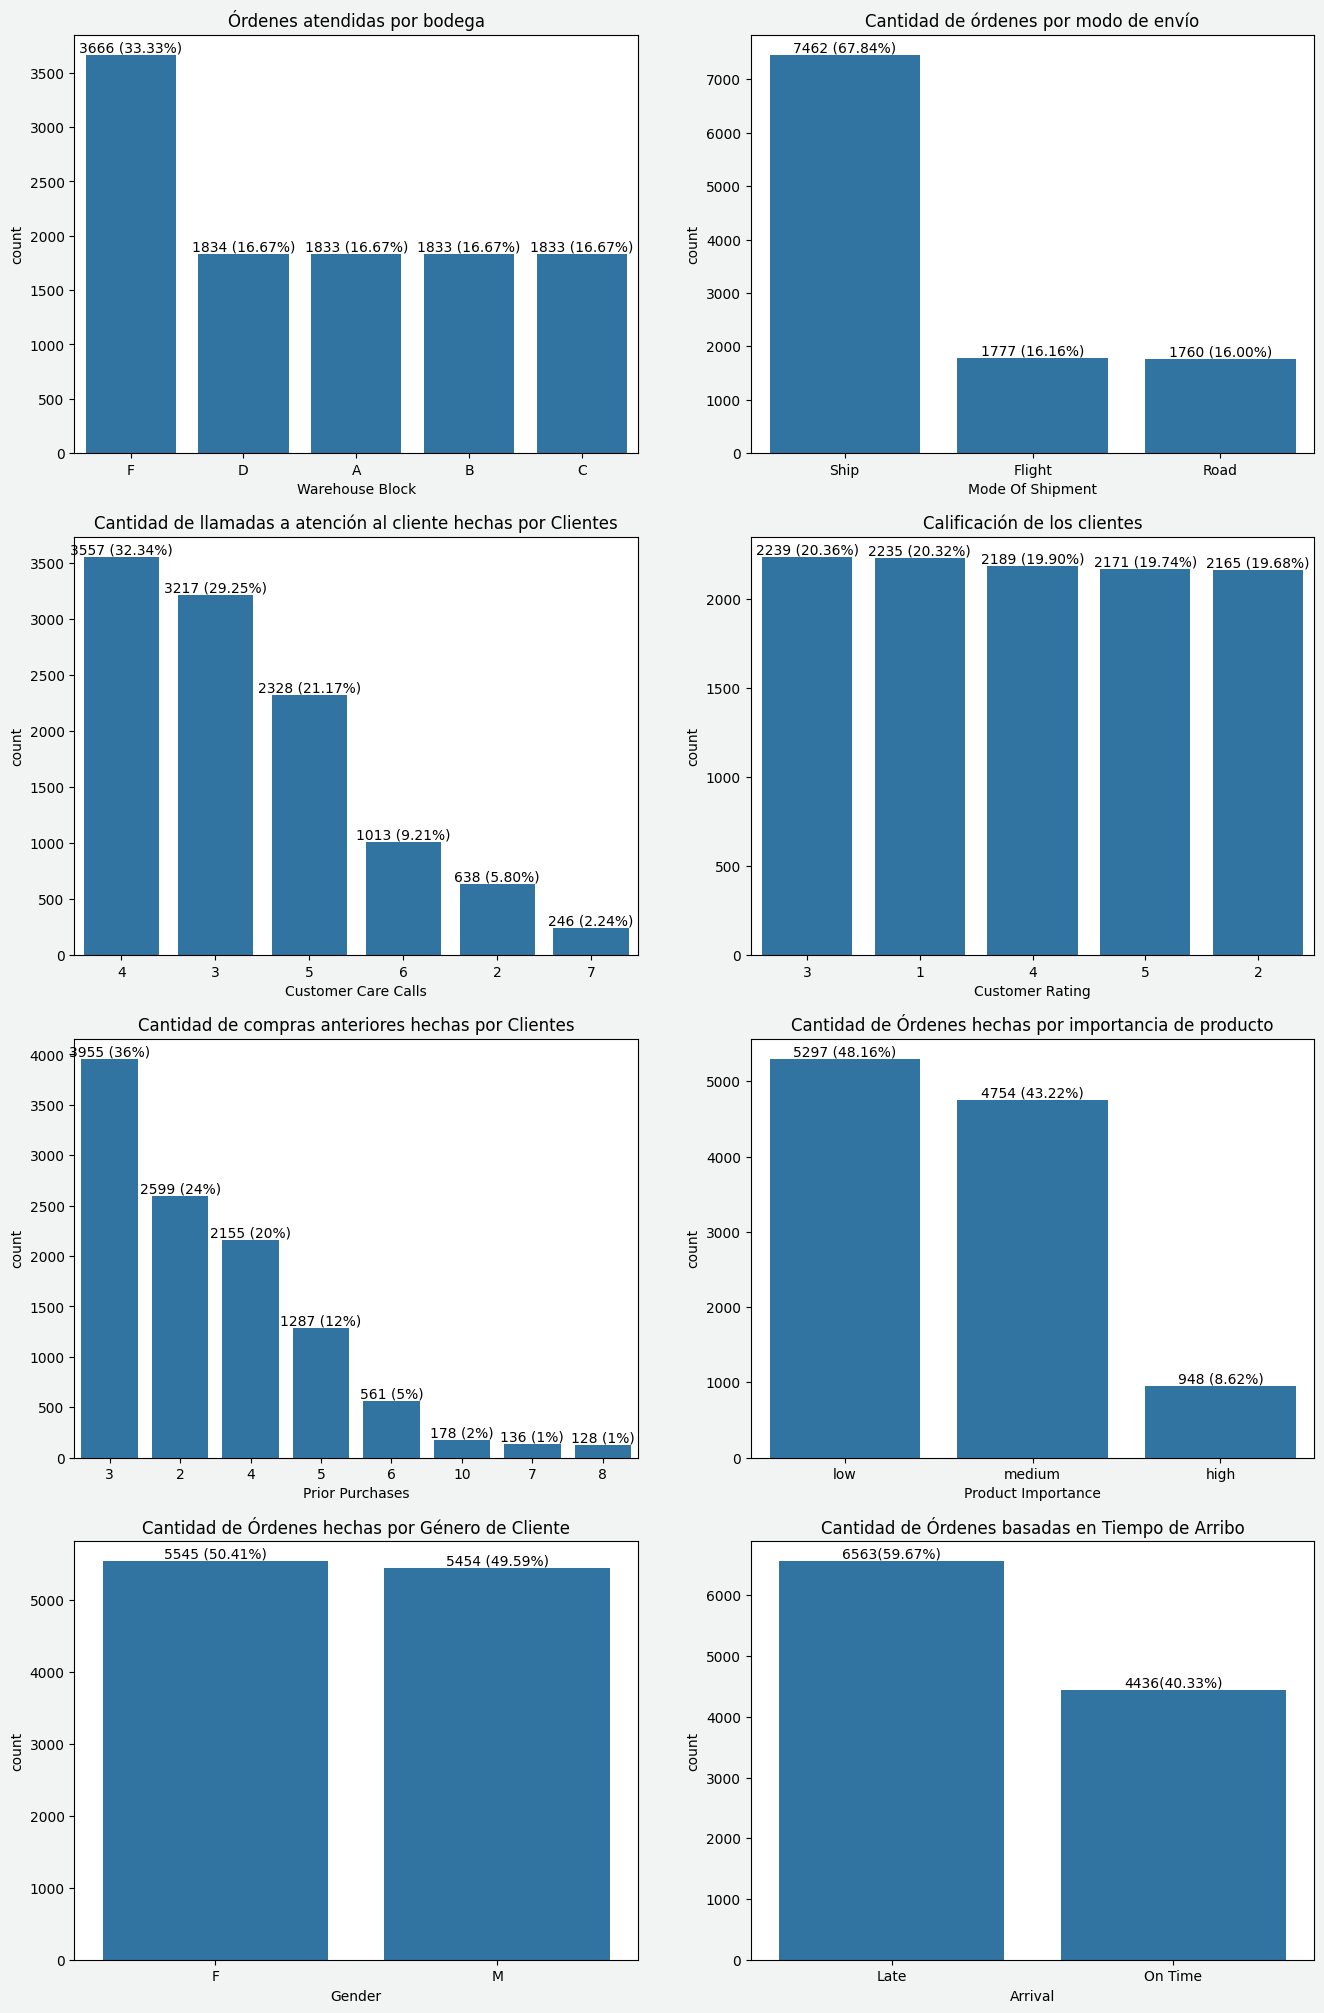

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

import seaborn as sns

import numpy as np
import pandas as pd

#Para datos Categóricos
fig, axes = plt.subplots(4,2,figsize=(16,25), facecolor='#F2F4F4')

## Gráfico de barras (countplot) para 'Warehouse Block'
abs_whs=ecomm["Warehouse Block"].value_counts(ascending=False)
rel_whs=ecomm["Warehouse Block"].value_counts(ascending=False, normalize=True).values*100
#axes[0,0] = sns.countplot(x=ecomm["Warehouse Block"], order=ecomm["Warehouse Block"].value_counts(ascending=False).index, ax=axes[0,0], palette='CMRmap_r')
axes[0,0] = sns.countplot(x=ecomm["Warehouse Block"], order=ecomm["Warehouse Block"].value_counts(ascending=False).index, ax=axes[0,0])
axes[0,0].set_title('Órdenes atendidas por bodega', fontsize=12)
lbs_whs=[f"{w[0]} ({w[1]:.2f}%)" for w in zip(abs_whs,rel_whs)]
axes[0,0].bar_label(container=axes[0,0].containers[0], labels=lbs_whs)

# Gráfico de barras (countplot) para 'Mode Of Shipment'
abs_ship = ecomm["Mode Of Shipment"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Mode Of Shipment"], order=abs_ship.index, ax=axes[0,1], palette=['#DC143C','#556b2f','#008b8b'])
sns.countplot(x=ecomm["Mode Of Shipment"], order=abs_ship.index, ax=axes[0,1])
axes[0,1].set_title('Cantidad de órdenes por modo de envío', fontsize=12)
rel_ship = ecomm["Mode Of Shipment"].value_counts(ascending=False, normalize=True ).values*100
lbs_ship = [f"{s[0]} ({s[1]:.2f}%)" for s in zip (abs_ship,rel_ship)]
axes[0,1].bar_label(container=axes[0,1].containers[0], labels=lbs_ship)

# Gráfico de barras (countplot) para 'Customer Care Calls'
abs_calls=ecomm["Customer Care Calls"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Customer Care Calls"], order=abs_calls.index,ax=axes[1,0],palette='cubehelix')
sns.countplot(x=ecomm["Customer Care Calls"], order=abs_calls.index,ax=axes[1,0])
axes[1,0].set_title('Cantidad de llamadas a atención al cliente hechas por Clientes', fontsize=12)
rel_calls=ecomm["Customer Care Calls"].value_counts(ascending=False, normalize=True).values*100
lbs_calls=[f"{c[0]} ({c[1]:.2f}%)" for c in zip(abs_calls, rel_calls)]
axes[1,0].bar_label(container=axes[1,0].containers[0], labels=lbs_calls)

# Gráfico de barras (countplot) para 'Customer Rating'
abs_rating = ecomm["Customer Rating"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Customer Rating"], order=abs_rating.index,ax=axes[1,1],palette="rocket")
sns.countplot(x=ecomm["Customer Rating"], order=abs_rating.index,ax=axes[1,1])
axes[1,1].set_title('Calificación de los clientes', fontsize=12);
rel_rating = ecomm["Customer Rating"].value_counts(ascending=False, normalize=True).values*100
lbs_rating = [f"{r[0]} ({r[1]:.2f}%)" for r in zip(abs_rating, rel_rating)]
axes[1,1].bar_label(container=axes[1,1].containers[0], labels=lbs_rating)

# Gráfico de barras (countplot) para 'Prior Purchases'
abs_prior_pur = ecomm["Prior Purchases"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Prior Purchases"], order=abs_prior_pur.index,ax=axes[2,0],palette='viridis')
sns.countplot(x=ecomm["Prior Purchases"], order=abs_prior_pur.index,ax=axes[2,0])
axes[2,0].set_title('Cantidad de compras anteriores hechas por Clientes', fontsize=12)
rel_prior_pur = ecomm["Prior Purchases"].value_counts(ascending=False, normalize=True).values*100
lbs_prior_pur = [f"{pur[0]} ({pur[1]:.0f}%)" for pur in zip(abs_prior_pur, rel_prior_pur)]
axes[2,0].bar_label(container=axes[2,0].containers[0], labels=lbs_prior_pur)

# Gráfico de barras (countplot) para 'Product Importance'
abs_priority = ecomm["Product Importance"].value_counts(ascending=False)
sns.countplot(x=ecomm["Product Importance"], order=abs_priority.index,ax=axes[2,1])
axes[2,1].set_title('Cantidad de Órdenes hechas por importancia de producto', fontsize=12)
rel_priority = ecomm["Product Importance"].value_counts(ascending=False, normalize=True).values*100
lbs_priority = [f"{i[0]} ({i[1]:.2f}%)" for i in zip(abs_priority, rel_priority)]
axes[2,1].bar_label(container=axes[2,1].containers[0], labels=lbs_priority)

# Gráfico de barras (countplot) para 'Gender'
abs_gender = ecomm["Gender"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Gender"], order=abs_gender.index,ax=axes[3,0],palette=['#800000','#191970'])
sns.countplot(x=ecomm["Gender"], order=abs_gender.index,ax=axes[3,0])
axes[3,0].set_title("Cantidad de Órdenes hechas por Género de Cliente", fontsize=12)
rel_gender = ecomm["Gender"].value_counts(ascending=False, normalize=True).values*100
lbs_gender = [f"{g[0]} ({g[1]:.2f}%)" for g in zip(abs_gender, rel_gender)]
axes[3,0].bar_label(container=axes[3,0].containers[0], labels=lbs_gender)

# Gráfico de barras (countplot) para 'Arrival'
abs_arrival = ecomm["Arrival"].value_counts(ascending=False)
#sns.countplot(x=ecomm["Arrival"], order=abs_arrival.index,ax=axes[3,1],palette='tab20c_r')
sns.countplot(x=ecomm["Arrival"], order=abs_arrival.index,ax=axes[3,1])
axes[3,1].set_title('Cantidad de Órdenes basadas en Tiempo de Arribo', fontsize=12)
axes[3,1].set_xticklabels(['Late', 'On Time'])
rel_arrival = ecomm["Arrival"].value_counts(ascending=False, normalize=True).values*100
lbls_arrival=[f"{a[0]}({a[1]:.2f}%)" for a in zip(abs_arrival,rel_arrival)]
axes[3,1].bar_label(container=axes[3,1].containers[0],labels=lbls_arrival);

De la gráfica anterior, podemos hacer inferencias de la siguiente manera:

* El 33,33% de los pedidos fueron atendidos por el bloque de almacenes F, mientras que otros bloques de almacenes atendieron el resto de pedidos por igual.
* La mayoría de los pedidos se enviaron por barco (67,84%), seguido del avión (16,16%) y finalmente por carretera (16%).
* El 32,34% de los clientes necesitaron realizar 4 llamadas para realizar el seguimiento de su(s) envío(s). Este es un punto de advertencia para la empresa, ya que las inquietudes de los clientes deben resolverse lo antes posible sin necesidad de que los clientes realicen varias llamadas.
* 1 es la calificación con el segundo conteo más alto. Es más probable que se deba al hecho de que los productos no se entregan a tiempo y al gran número de llamadas que los clientes deben realizar.
* Alrededor del 36% de los clientes habían realizado 3 compras anteriores. Hay 306 clientes fieles que han realizado al menos 8 compras anteriores.
* Sólo el 8,62% de los pedidos son de gran importancia. La mayoría de los pedidos son de baja importancia (48,16%).
* El 50,41% de los clientes son mujeres, mientras que el resto son hombres.
* Más de la mitad del total de 10.999 pedidos (59,67%) llegaron con retraso.

Transformo "Gender"
Masculino (M) y Femenino (F)
F ==> 1
M ==> 0

# **Fase 3: Modelado**
Antes de construir un modelo supervisado de aprendizaje automático, comprendamos la siguiente terminología:

**Objetivo**
(también conocido como variable dependiente, variable Y, respuesta, resultado): la variable que estamos tratando de predecir.

**Características**
(también conocidas como variable independiente, variable X, predictor, atributo): la variable utilizada para predecir el objetivo.

**Registro** (también conocido como fila, caso, instancia, ejemplo): el vector de valores predictivos y de resultado para un individuo o caso específico.

**Regresión**
Para identificar cuánto cambia la variable de salida continua (numérica) con el cambio en una (en el caso de regresión lineal simple) o más (en el caso de regresión lineal múltiple) características.

**Clasificación**
Predecir una etiqueta de clase, que es una elección de una lista predefinida de posibilidades. Se puede dividir en clasificación binaria (que distingue exactamente dos clases) y clasificación multiclase (que distingue entre más de dos clases).

Este estudio de caso sería una *clasificación binaria*, ya que asignaríamos la calificación de 2 a 5 como 0 para representar una calificación distinta de 1. Dado que el resultado son datos categóricos, necesitamos usar modelos de clasificación ML, como regresión lógica, K-vecinos, SVM, etc.

Para preparar el conjunto de datos para la construcción del modelo, necesitamos escalar las variables numéricas y usar pandas.get_dummies para crear variables ficticias para variables categóricas.
Después de eso, debemos separar los datos en datos de entrenamiento y de prueba, así como importar las bibliotecas de algoritmos de ML necesarias para construir los modelos.

In [11]:
# Importar librarías
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier as DT

#['ID',
# 'Warehouse Block',
# 'Mode Of Shipment',
# 'Customer Care Calls',
# 'Customer Rating', --------- ¡¡¡ esta es la variable que debería predecir !!!
# 'Cost Of The Product',
# 'Prior Purchases',
# 'Product Importance',
# 'Gender',
# 'Discount Offered',
# 'Weight In Gms',
# 'Arrival']

# Crear variables dummy para las variables categóricas
ecomm['Gender'] = ecomm.Gender.map({'F':0, 'M':1})
ecomm['Customer Rating'] = ecomm['Customer Rating'].map({5:0, 4:0, 3:0, 2:0, 1:1})

dummy = pd.DataFrame(pd.get_dummies(ecomm[['Warehouse Block', 'Mode Of Shipment','Product Importance']]))

# Normalizamos los datos
from sklearn.preprocessing import scale
ecomm1 = pd.DataFrame(scale(ecomm[['Cost Of The Product','Discount Offered', 'Weight In Gms']]), columns=['Cost Of The Product','Discount Offered', 'Weight In Gms'])

# Crear nuevo datafame para modelo
# Un objeto DataFrame tiene 2 axes: “axis 0” y “axis 1”. “axis 0” representa a las filas y “axis 1” representa a las columnas.
ecomm_final = pd.concat([ecomm1, dummy,ecomm[['Customer Care Calls', 'Prior Purchases','Gender', 'Arrival','Customer Rating']]], axis=1)

# Dividir datos de salida y de entrada
# Para los de entrada, no me traigo la última columna.
X = ecomm_final.iloc[:,:-1] # entrada
# Para los de salida, sólo uso el puntaje: 'Customer Rating'
Y = ecomm_final['Customer Rating'] # salida

# Dividir datos en datos de entrenamiento y datos de prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.25,shuffle=True)

# Agrego 2 modelos de clasificación: KNN y Árbol de Decisión.
classifiers=[]

KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
classifiers.append(KNN_model)

DT_model = DT(criterion = 'entropy',max_depth=4)
classifiers.append(DT_model)

# **Fase 4: Evaluación**
Según el resultado a continuación, podríamos elegir KNN como nuestro modelo final (basado a la métrica precisión de prueba)

In [17]:
from sklearn.metrics import accuracy_score

accuracy_train = []
accuracy_test = []

for clf in classifiers:
    clf.fit(X_train, Y_train)
    pred_train = clf.predict(X_train)
    pred_test = clf.predict(X_test)
    acc_train = accuracy_score(Y_train, pred_train)
    acc_test = accuracy_score(Y_test, pred_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

accuracy_result = pd.DataFrame(data={'Model':['KNN','Decision Tree'],
                                     'Training Accuracy':accuracy_train,
                                     'Testing Accuracy':accuracy_test})

# Ordeno los resultados de las métricas y comparo cuál es mejor.
accuracy_result.sort_values('Testing Accuracy',ascending=False)

,Model,Training Accuracy,Testing Accuracy
1,Decision Tree,0.799127,0.787273
0,KNN,0.798642,0.785091


**Fase 5: Implementación (usando Flask + HTML + CSS)**

¿Por qué es necesaria la implementación?
No todos los usuarios son codificadores, por lo que no es realista esperar que los usuarios finales sepan cómo ejecutar Jupyter Notebook y obtener resultados. Por lo tanto, la implementación del modelo es probablemente la parte más crucial del aprendizaje automático.

¿Cómo implementamos un modelo?
Depende del lenguaje de programación que quieras utilizar.
Si estás usando R, se puede usar R Shiny. Si está utilizando Python, se puede utilizar Flask, pero también hace falta tener conocimientos básicos de HTML y CSS.
Para este caso de estudio, usaría Flask como demostración.

* Ahora hemos creado un modelo utilizando un clasificador KNN.

* Luego, necesitamos usar Pickle para serializar el modelo entrenado y guardar el formato serializado en un archivo.

* Después de ejecutar el código a continuación, se podrá encontrar un archivo pickle llamado "finalized_knn.pkl" en el directorio del proyecto. Es el que  usaríamos en main.py (el archivo de la aplicación para hacer una predicción basada en las entradas del usuario y enviar el resultado al usuario)

In [21]:
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

# El modulo pickle implementa protocolos binarios para serializar y deserializar una estructura de objetos Python.
# «Pickling» es el proceso mediante el cual una jerarquía de objetos de Python se convierte en una secuencia de bytes,
# «unpickling» es la operación inversa, mediante la cual una secuencia de bytes de un archivo binario (binary file) ó un objeto tipo binario (bytes-like object)
# es convertido nuevamente en una jerarquía de objetos.
import pickle

# Cargar dataset desde un archivo de texto separado por comas.
ecomm = pd.read_csv(V_PATH_Y_NOMRE_ARCHIVO, sep = ",")


# Renombrar columnas
cols=[]
for i in ecomm.columns[1:-1]:
    i = i.lower()
    cols.append(i);
cols = ['ID'] +  cols
cols.append('arrival')
ecomm.columns = cols

# Preprocesamiento de Datos
# Transformaciones de variables categóricas
ecomm['gender'] = ecomm.gender.map({'F':0, 'M':1})

# Voy a usar este cambio de valores para predecir la salida.
#ecomm['customer_rating'] = ecomm['customer_rating'].map({5:0, 4:0, 3:0, 2:0, 1:1})
# Para hacer un seguimiento, entre 3 y 5 valdrá 0 y entre 1 y 2 valdrá 1
ecomm['customer_rating'] = ecomm['customer_rating'].map({5:0, 4:0, 3:0, 2:1, 1:1})

# Crear columnas Dummy
dummy = pd.DataFrame(pd.get_dummies(ecomm[['warehouse_block', 'mode_of_shipment','product_importance']]))
ecomm1 = pd.DataFrame(scale(ecomm[['cost_of_the_product','weight_in_gms','discount_offered']]), columns=['cost_of_the_product','weight_in_gms','discount_offered'])
# Resultado del Preprocesamiento de Datos.
ecomm_final = pd.concat([ecomm1,dummy,ecomm[['customer_care_calls', 'prior_purchases','gender', 'arrival','customer_rating']]], axis=1)

# Dividir los datos en salida y entrada
X = ecomm_final.iloc[:,:-1] # entradas
Y = ecomm_final['customer_rating'] # salidas

# Contrucción del modelo
KNN_model = KNeighborsClassifier(n_neighbors=11, metric='euclidean')
KNN_model.fit(X, Y)

# Guardar el modelo
filename = 'finalized_knn.pkl'
pickle.dump(KNN_model, open(filename, 'wb'))


#Buscar en: "/content/finalized_knn.pkl"

In [19]:
ecomm_final

,cost_of_the_product,weight_in_gms,discount_offered,warehouse_block_A,warehouse_block_B,warehouse_block_C,warehouse_block_D,warehouse_block_F,mode_of_shipment_Flight,mode_of_shipment_Road,mode_of_shipment_Ship,product_importance_high,product_importance_low,product_importance_medium,customer_care_calls,prior_purchases,gender,arrival,customer_rating
0,-0.690722,-1.468240,1.889983,False,False,False,True,False,True,False,False,False,True,False,4,3,0,1,0
1,0.120746,-0.333893,2.815636,False,False,False,False,True,True,False,False,False,True,False,4,2,1,1,0
2,-0.565881,-0.159002,2.136824,True,False,False,False,False,True,False,False,False,True,False,2,4,1,1,0
3,-0.711529,-1.502484,-0.208162,False,True,False,False,False,True,False,False,False,False,True,3,4,1,1,0
4,-0.545074,-0.703244,2.013404,False,False,True,False,False,True,False,False,False,False,True,2,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,0.869792,-1.281730,-0.763553,True,False,False,False,False,False,False,True,False,False,True,4,5,0,1,1
10995,0.453655,-1.459679,-0.455002,False,True,False,False,False,False,False,True,False,False,True,4,5,0,0,1
10996,0.661724,-1.515937,-0.578423,False,False,True,False,False,False,False,True,False,True,False,5,5,0,0,0
10997,0.266394,-1.482304,-0.701843,False,False,False,False,True,False,False,True,False,False,True,5,6,1,0,0
